## Author : Priyanka Warude

### Mail : warudepriya99@gmail.com

### Project : Loan Prediction

### Dataset : https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/download

# About the company

### Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan

# Problem Statement

### The company wants to automate the loan eligibility process (real-time) basedon customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are



## Features of our data
#### 1.LoanID= Unique Loan ID
#### 2.Gender= Male/ Female
#### 3.Married= Applicant married (Y/N)
#### 4.Dependents= Number of dependents
#### 5.Education= Applicant Education (Graduate/ Under Graduate)
#### 6.SelfEmployed= Self-employed (Y/N)
#### 7.ApplicantIncome= Applicant income
#### 8.CoapplicantIncome= Coapplicant income
#### 9.LoanAmount= Loan amount in thousands
#### 10.LoanAmountTerm= Term of the loan in months
#### 11.CreditHistory= Credit history meets guidelines 12.PropertyArea= Urban/ Semi-Urban/ Rural
#### 13.LoanStatus= (Target) Loan approved (Y/N) ##Features of a Testing dataset:-

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv(r"C:\Users\PRIYANKA\Downloads\archive (3)\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### We can observe from the above top 5 entries that there are object and numeric data types in our dataset There are null values in our data which needs to be handled before we start building our model Loan Status is our target columns which needs to be predicted based on the remaining independent features of our data

## Checking test data



In [12]:
test=pd.read_csv(r"C:\Users\PRIYANKA\Downloads\archive (3)\test_Y3wMUE5_7gLdaTN.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Above information reflects that our dataset has 5 numerical and 8 object columns There are null values in multiple columns which needs to be handledThere are total 13 columns in our dataset with 614 entries

# Handling null values¶

### Finding the mode for object datatype which can be used to replace the null value

In [14]:
print('Gender Mode: ',df['Gender'].mode())
print('Married mode: ',df['Married'].mode())
print('Self_Employed',df['Self_Employed'].mode())
print('Credit_History',df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married mode:  0    Yes
Name: Married, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    1.0
Name: Credit_History, dtype: float64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

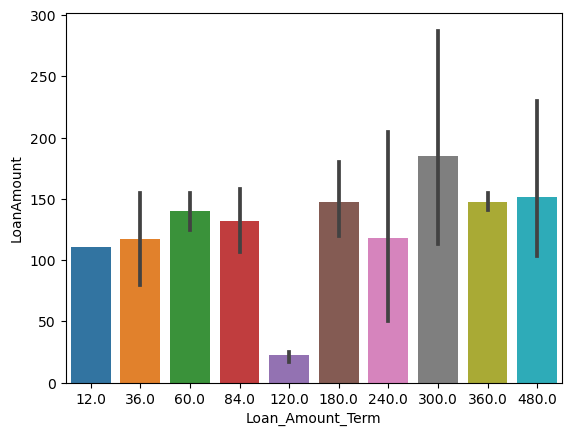

In [15]:
sns.barplot(x=df['Loan_Amount_Term'],y=df['LoanAmount'])

### from the above visualisation we can observe the loan amount the term is somewhat correlated, higher the loan amount higher the term, but there are certain exceptions like in case of 25k amount the term is 120 months

In [16]:
df[['Loan_Amount_Term','LoanAmount']][df['Loan_Amount_Term'].isnull()]

,Loan_Amount_Term,LoanAmount
19,NaN,115.0
36,NaN,100.0
44,NaN,96.0
45,NaN,88.0
73,NaN,95.0
112,NaN,152.0
165,NaN,182.0
197,NaN,120.0
223,NaN,175.0
232,NaN,120.0


### observing the null loan amount ranging between 80-180...and with the above visual analysis we can observe that for that particular range loan amount term is 64/84 so lets fill it with same value

In [17]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### 3+ is an invalid value entered which is making this int column as object which needs to be corrected and converted into numeric data type

In [18]:
df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [19]:
df[['Dependents','Married']][df['Dependents'].isnull()]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


### Replacing null values with mean for numberic and mode for object data type

In [20]:
df['Gender'].fillna('Male',inplace=True)#replacing with mode
df['Married'].fillna('Yes',inplace=True)#replacing with mode
df['Self_Employed'].fillna('No',inplace=True)#replacing with mode
df['LoanAmount'].fillna((df['LoanAmount'].mean()),inplace=True)#replacing with mean
df['Loan_Amount_Term'].fillna(84,inplace=True)#replacing with suitable option after visual analysis
df['Credit_History'].fillna(1.0,inplace=True)#replacing with mode
df['Dependents'].fillna(0,inplace=True)#replacing with mode

In [21]:
df['Dependents']=df['Dependents'].astype('int')
df['Dependents'].dtype

dtype('int32')

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Missing values has now been handled

### Lets drop the loan_id column as its a noise for our model and doesnt make any impact on the target

In [23]:
df.drop('Loan_ID',axis=1,inplace=True)

### Checking unique values in our dataset for better understanding

In [24]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Checking the description of our data to check for skewness and distribution

In [25]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,336.117264,0.855049
std,1.009623,6109.041673,2926.248369,84.037468,75.029168,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


### There seems to be high positive skewness in Dependents, Applicant Income,Co applicant income, loan amount wherein there might be chances of outliers which needs to be checkedLoan amount term and credit history has negative skewness

# Checking for outliers

<Figure size 1000x400 with 0 Axes>

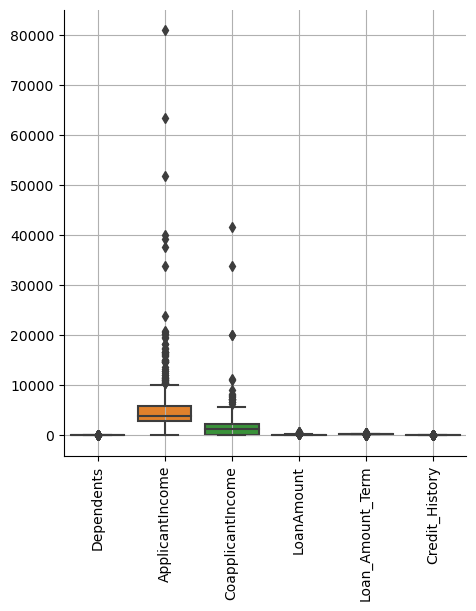

In [26]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### There seems to be outliers in applicant income and coapplicant income which needs to be taken into consideration

# Visually analysing object data type

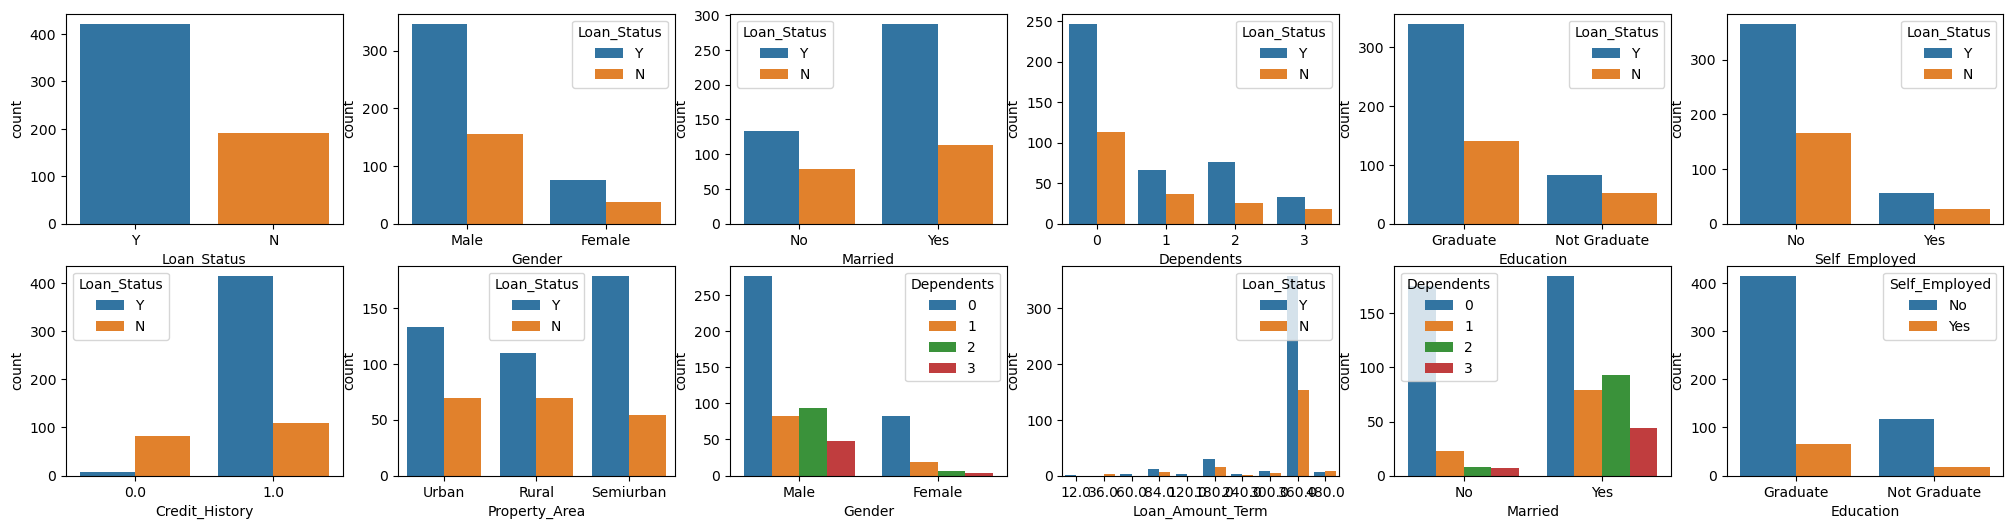

In [27]:
fig, axs = plt.subplots(figsize=(25,6),ncols=6,nrows=2)
sns.countplot(x=df['Loan_Status'],ax=axs[0,0])
sns.countplot(x=df['Gender'],hue=df['Loan_Status'],ax=axs[0,1])
sns.countplot(x=df['Married'],hue=df['Loan_Status'],ax=axs[0,2])
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'],ax=axs[0,3])
sns.countplot(x=df['Education'],hue=df['Loan_Status'],ax=axs[0,4])
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'],ax=axs[0,5])
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'],ax=axs[1,0])
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'],ax=axs[1,1])
sns.countplot(x=df['Gender'],hue=df['Dependents'],ax=axs[1,2])
sns.countplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'],ax=axs[1,3])
sns.countplot(x=df['Married'],hue=df['Dependents'],ax=axs[1,4])
sns.countplot(x=df['Education'],hue=df['Self_Employed'],ax=axs[1,5])
plt.show()

### 1) Loan_Status is our target variable which seems to be imbalanced as its in 1:3 ratio which needs to be worked on for our model to make accurate predictions 
### 2) Males are more likely to be eligible for loans compared to female 
### 3) Married are more likely to be eligible for loans compared to non married
### 4) People with less dependents are eligible for loans
### 5) Graduates are eligible for loan compared to non graduate 
### 6) Non Selfemployed are eligible for loan compared to selfemployed 
### 7) Poeple with good credit score are more likely to be eligible for loan compared to low credit scored
### 8) Semiurban and Urban people have are eligible for loan compared to rural population 
### 9) Male have more dependents compared to female 
### 10) Mostly people opt for 360 months term loan 
### 11) Married people have more dependents compared to female 
### 12) Graduates are selfemployed compared to non graduates

# Visually analysing numeric data type¶

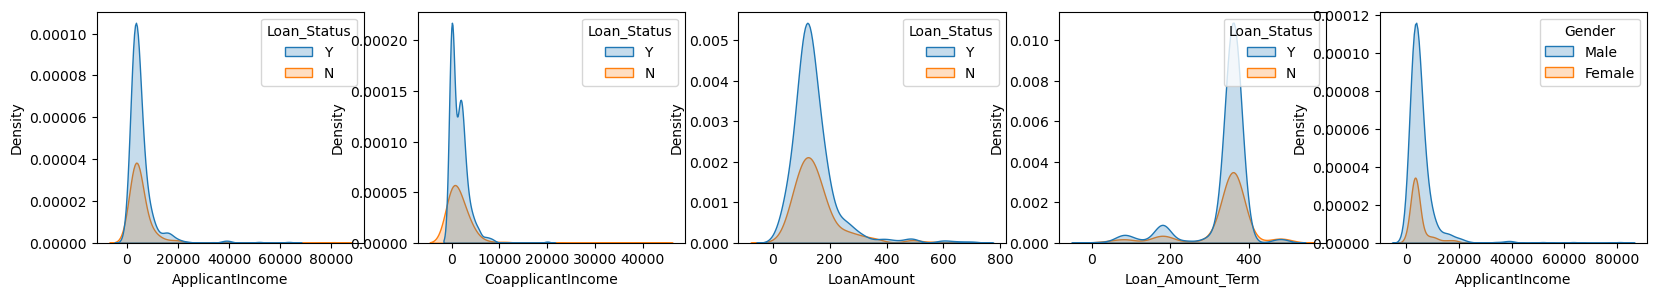

In [29]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.kdeplot(x=df['ApplicantIncome'],hue=df['Loan_Status'],fill=True,ax=axs[0])
sns.kdeplot(x=df['CoapplicantIncome'],hue=df['Loan_Status'],fill=True,ax=axs[1])
sns.kdeplot(x=df['LoanAmount'],hue=df['Loan_Status'],fill=True,ax=axs[2])
sns.kdeplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'],fill=True,ax=axs[3])
sns.kdeplot(x=df['ApplicantIncome'],hue=df['Gender'],fill=True,ax=axs[4])
plt.show()

#### 1)There is high positive skewness in Applicant income and coapplicant income
#### 2)There is negative skewness in loan_Amount_term
#### 3)Income range between 0:20k are eligible for loan


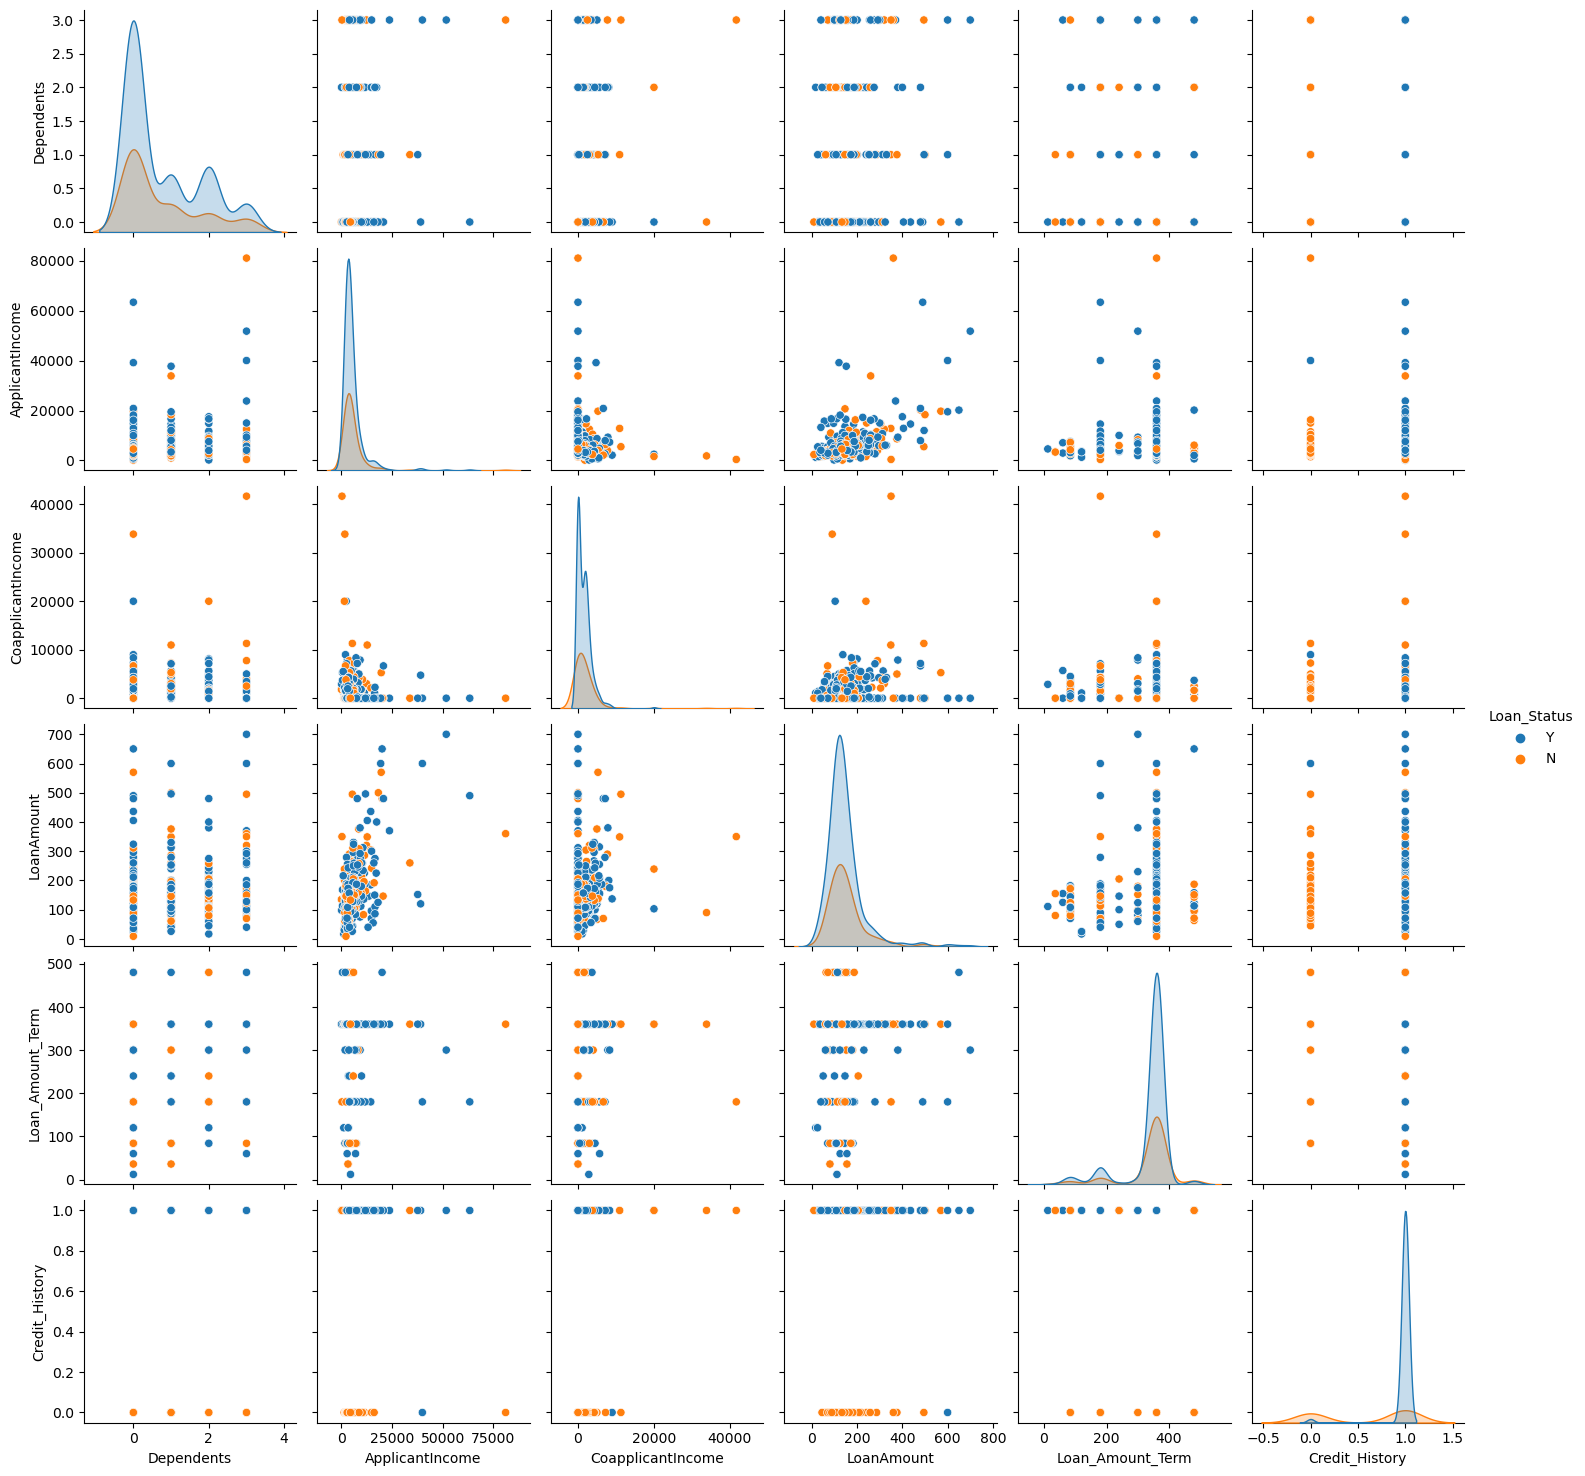

In [30]:
sns.pairplot(df,hue='Loan_Status')


### Fetching all object data typecolumns to covert

In [31]:
obj_col=df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

## Converting object to numeric data type

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[obj_col]=oe.fit_transform(df[obj_col])
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0


## Saving our cleaned , preprocessed df in data variable for future analysis if needed

In [33]:
data=df

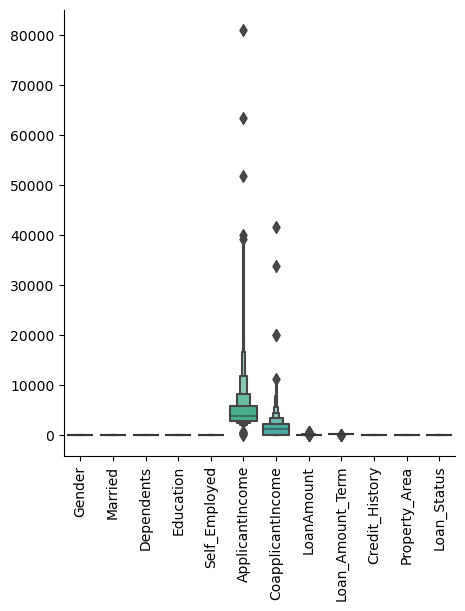

In [34]:
sns.catplot(data=df,kind='boxen')
plt.xticks(rotation=90)
plt.show()

In [35]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,336.117264,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,75.029168,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


## Correlation of data

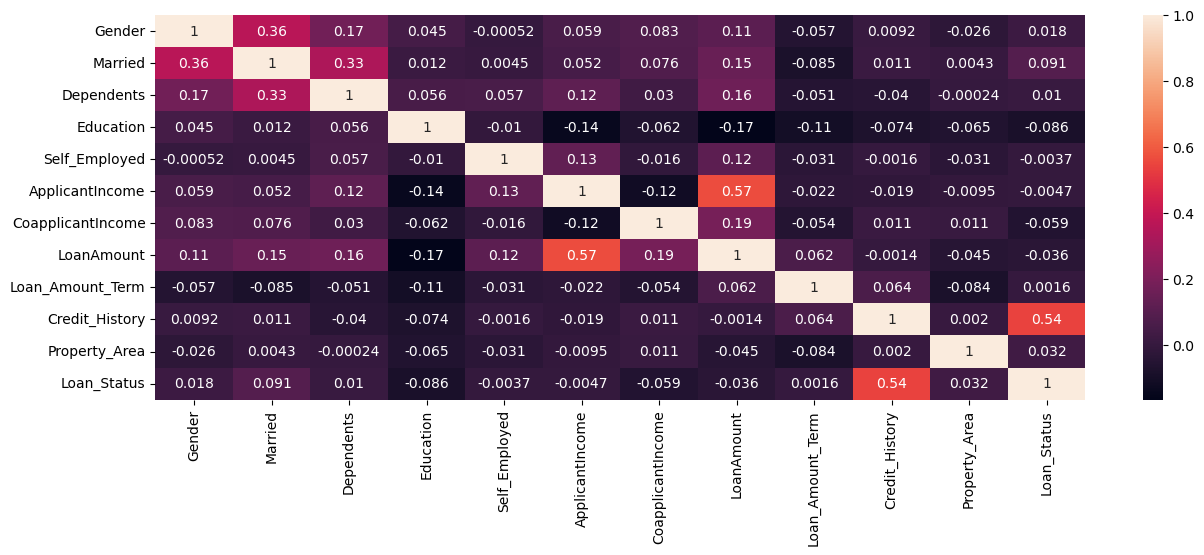

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### 1)Credit history is highly correlated to our target
### 2)Education, self_employed, coapplicant income, loan amount, applicant income has negative correlation
### 3)Loan amount and applicant are highly correlated
### 4)Gender-Married & Dependents-Married are correlated
### 5)This reflects that there are multicoreniality

## Normalising data¶

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298,1.0


## Splitting dataset

In [38]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=4,test_size=0.25,stratify=y)

### Creating model function to test multiple models and choose the ideal one

In [40]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train_accuracy=model.score(xtrain,ytrain)
    test_accuracy=model.score(xtest,ytest)
    print(str(model)[:-2],'Accuracy')
    print('Accuracy:',accuracy_score(ytest,ypred),"\nClassification Report:\n",classification_report(ytest,ypred), \
          '\nConfusion Matrix: \n', confusion_matrix(ytest,ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    print()
    return model

### Testing the accuracy of our model

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier Accuracy
Accuracy: 0.8311688311688312 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.54      0.67        48
         1.0       0.82      0.96      0.89       106

    accuracy                           0.83       154
   macro avg       0.84      0.75      0.78       154
weighted avg       0.84      0.83      0.82       154
 
Confusion Matrix: 
 [[ 26  22]
 [  4 102]]
Training Accuracy: 0.8130434782608695
Testing Accuracy :0.8311688311688312


SVC Accuracy
Accuracy: 0.8246753246753247 
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.44      0.61        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.82       154
   macro avg       0.90      0.72      0.75       154
weighted avg       0.86      0.82      0.80       154
 
Confusion Matrix: 
 [[ 21  27]
 [  0 106]]
Training Accuracy: 0.808695652

### KNN, Logistic regression,GaussianNB, and Random forest classifier...all seem to give the best accuracy of 82% with 0 false positive errors but our recall and precision doesnt seem to be upto mark so lets try imb-learn to balance our target variable ad train our model

# KNN Hypertuning

In [42]:
tr=[]
te=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    tr.append(train)
    te.append(test)

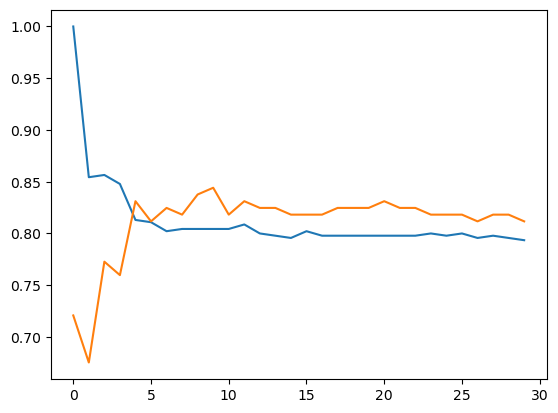

In [43]:
plt.plot(tr)
plt.plot(te)

#### 5 looks like the best k value

In [44]:
knn=mymodel(KNeighborsClassifier(n_neighbors=5))

KNeighborsClassifier Accuracy
Accuracy: 0.8311688311688312 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.54      0.67        48
         1.0       0.82      0.96      0.89       106

    accuracy                           0.83       154
   macro avg       0.84      0.75      0.78       154
weighted avg       0.84      0.83      0.82       154
 
Confusion Matrix: 
 [[ 26  22]
 [  4 102]]
Training Accuracy: 0.8130434782608695
Testing Accuracy :0.8311688311688312




# Advance concept of SVM- Kernel

In [45]:
from sklearn.model_selection import GridSearchCV
parameters={'C':[0.1,10],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [46]:
print('GridBestParameter: ',grid.best_params_)
print('GridBestScore: ',grid.best_score_)
print('GridBestEstimator: ',grid.best_estimator_)

GridBestParameter:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
GridBestScore:  0.8
GridBestEstimator:  SVC(C=10, gamma=0.01)


In [47]:
svm=mymodel(grid.best_estimator_)

SVC(C=10, gamma=0.0 Accuracy
Accuracy: 0.8311688311688312 
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.46      0.63        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.83       154
   macro avg       0.90      0.73      0.76       154
weighted avg       0.86      0.83      0.81       154
 
Confusion Matrix: 
 [[ 22  26]
 [  0 106]]
Training Accuracy: 0.8065217391304348
Testing Accuracy :0.8311688311688312




## Trying imblearn to balance our target

In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298,1.0


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

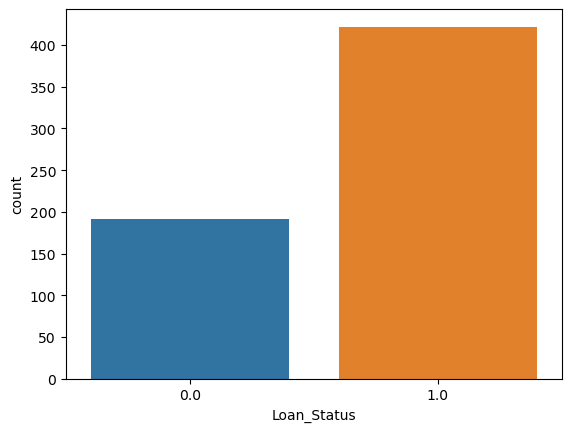

In [49]:
sns.countplot(df['Loan_Status'])

In [51]:
! pip install imblearn

     ------------------------------------ 226.0/226.0 kB 629.0 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 968.8 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [52]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print('Shape before balancing data',x.shape,y.shape)

#Importing necessary modules
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#Classifying the data
x,y=make_classification(n_samples=422,weights=[0.99],flip_y=0)

#Creating an object
ros=RandomOverSampler(sampling_strategy='minority')
x,y=ros.fit_resample(x,y)
print('Shape after balancing data',x.shape,y.shape)

Shape before balancing data (614, 11) (614,)
Shape after balancing data (834, 20) (834,)


In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.25)
print('Shape: ',xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

Shape:  (625, 20) (625,) (209, 20) (209,)


In [54]:
knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier Accuracy
Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       111

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209
 
Confusion Matrix: 
 [[ 98   0]
 [  0 111]]
Training Accuracy: 0.9984
Testing Accuracy :1.0


SVC Accuracy
Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       111

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209
 
Confusion Matrix: 
 [[ 98   0]
 [  0 111]]
Training Accuracy: 1.0
Testing Accuracy :1.0


DecisionTreeClassifier Accuracy
Accuracy

### GausianNB or Logistic regression can be used for our model as its giving effective training testing accuracy without any risk of overfitting

In [55]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print('Shape of model before balancing data',x.shape,y.shape)

#Importing necessary modules
from imblearn.over_sampling import SMOTE

#Classifying the data
make_classification(n_samples=422,weights=[0.99],flip_y=0,random_state=2)

#Creating an object
s=SMOTE(sampling_strategy='minority')
x,y=s.fit_resample(x,y)

print('Shape of model after balancing data',x.shape,y.shape)

Shape of model before balancing data (614, 11) (614,)
Shape of model after balancing data (844, 11) (844,)


In [56]:
knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier Accuracy
Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       111

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209
 
Confusion Matrix: 
 [[ 98   0]
 [  0 111]]
Training Accuracy: 0.9984
Testing Accuracy :1.0


SVC Accuracy
Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       111

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209
 
Confusion Matrix: 
 [[ 98   0]
 [  0 111]]
Training Accuracy: 1.0
Testing Accuracy :1.0


DecisionTreeClassifier Accuracy
Accuracy